In [36]:
import pandas as pd

# Read the Data

In [37]:
cov_Rates, avg_Sizes = list(range(10)), list(range(10))
for subset_id in range(10):
    cov_Rates[subset_id] = pd.read_csv("results/cov_rates_{}0.csv".format(subset_id+1))
    cov_Rates[subset_id].set_index('Unnamed: 0', inplace=True)
    avg_Sizes[subset_id] = pd.read_csv("results/avg_sizes_{}0.csv".format(subset_id+1))
    avg_Sizes[subset_id].set_index('Unnamed: 0', inplace=True)

cov_Rates[0]

,SplitPredictor,ClusterPredictor,ClassWisePredictor
Unnamed: 0,,,
THR,0.865,0.869,0.865
APS,0.876,0.872,0.866
SAPS,0.878,0.872,0.883
RAPS,0.862,0.864,0.860


## Line-plots against Datasize for Different CP Schemes 

In [38]:
lines_covRates = cov_Rates[0]
lines_avgSizes = avg_Sizes[0]

# 假设cov_Rates是你提供的包含10个DataFrame的列表

# 从每个DataFrame中提取元素，组成列表
for predictor in range(4):
    for score_function in range(3):
        sublist = [df.iloc[predictor, score_function] for df in cov_Rates]
        sublist = ','.join(map(str, sublist))
        lines_covRates.iloc[predictor, score_function] = sublist

for predictor in range(4):
    for score_function in range(3):
        sublist = [df.iloc[predictor, score_function] for df in avg_Sizes]
        sublist = ','.join(map(str, sublist))
        lines_avgSizes.iloc[predictor, score_function] = sublist
# 显示处理结果
print(lines_covRates)

lines_covRates = lines_covRates.applymap(lambda x: list(map(float, x.strip('[]').split(','))))
lines_avgSizes = lines_avgSizes.applymap(lambda x: list(map(float, x.strip('[]').split(','))))
lines_avgSizeRates = lines_avgSizes.applymap(lambda x: [s/S for (s,S) in zip(x, [10*(i+1) for i in range(10)])])

                                               SplitPredictor  \
Unnamed: 0                                                      
THR         0.865,0.8665,0.877,0.86925,0.8676,0.8771666666...   
APS         0.876,0.8755,0.8736666666666667,0.87475,0.8788...   
SAPS        0.878,0.8695,0.8846666666666667,0.86875,0.8682...   
RAPS        0.862,0.8705,0.877,0.87275,0.8712,0.8766666666...   

                                             ClusterPredictor  \
Unnamed: 0                                                      
THR         0.869,0.8685,0.877,0.86875,0.8694,0.8788333333...   
APS         0.872,0.8755,0.8813333333333333,0.87475,0.8792...   
SAPS        0.872,0.8685,0.8836666666666667,0.87025,0.8694...   
RAPS        0.864,0.869,0.879,0.87325,0.8738,0.87733333333...   

                                           ClassWisePredictor  
Unnamed: 0                                                     
THR         0.865,0.866,0.872,0.8645,0.8646,0.870166666666...  
APS         0.866,0.873,0.

### Compare the Score Functions

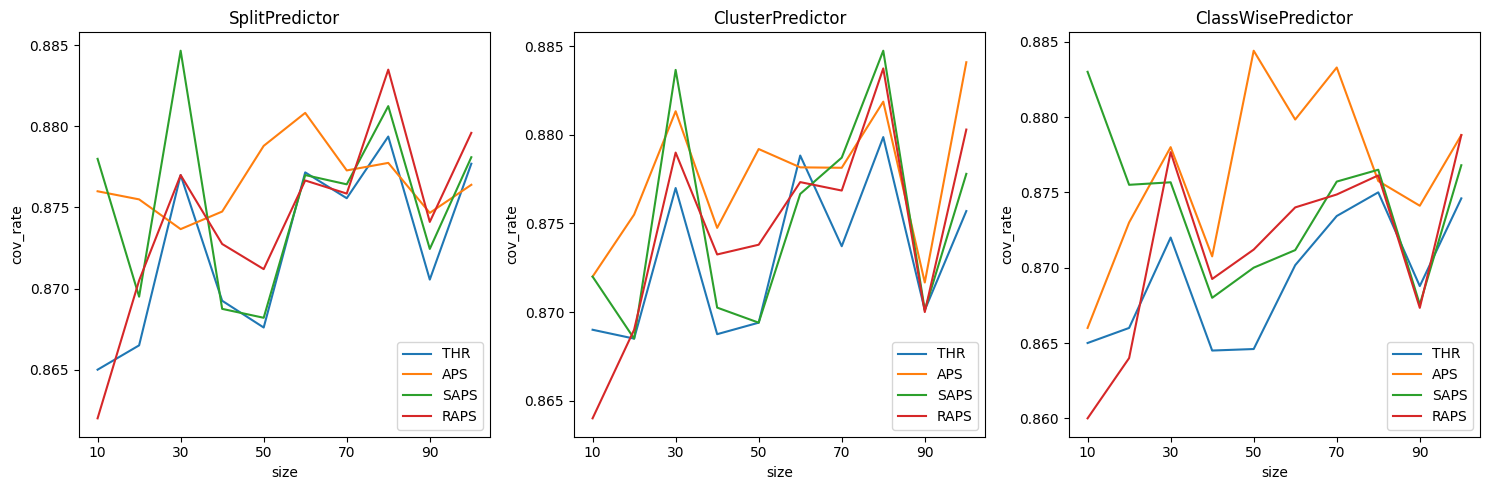

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def format_ticks(tick, pos):
    return f'{int((tick+1)*10)}'

formatter = FuncFormatter(format_ticks)
# 创建三个并排的折线图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for j, predictor in zip(range(3), lines_covRates.columns):
    # 取出每列的四条折线数据
    lines_data = lines_covRates.iloc[:, j]

    # 绘制每行的折线
    for i, score_function in zip(lines_covRates.index, lines_data):
        axes[j].plot(score_function, label=i)

    # 添加图例
    axes[j].legend(loc='lower right')
    # 设置图标题和坐标轴标签
    axes[j].set_title(predictor)
    axes[j].set_xlabel("size")
    axes[j].set_ylabel('cov_rate')

    axes[j].xaxis.set_major_formatter(formatter)

# 调整布局，避免重叠
plt.tight_layout()

# 显示折线图
plt.show()
fig.savefig('results_figures/scores_covRate_compare.png')

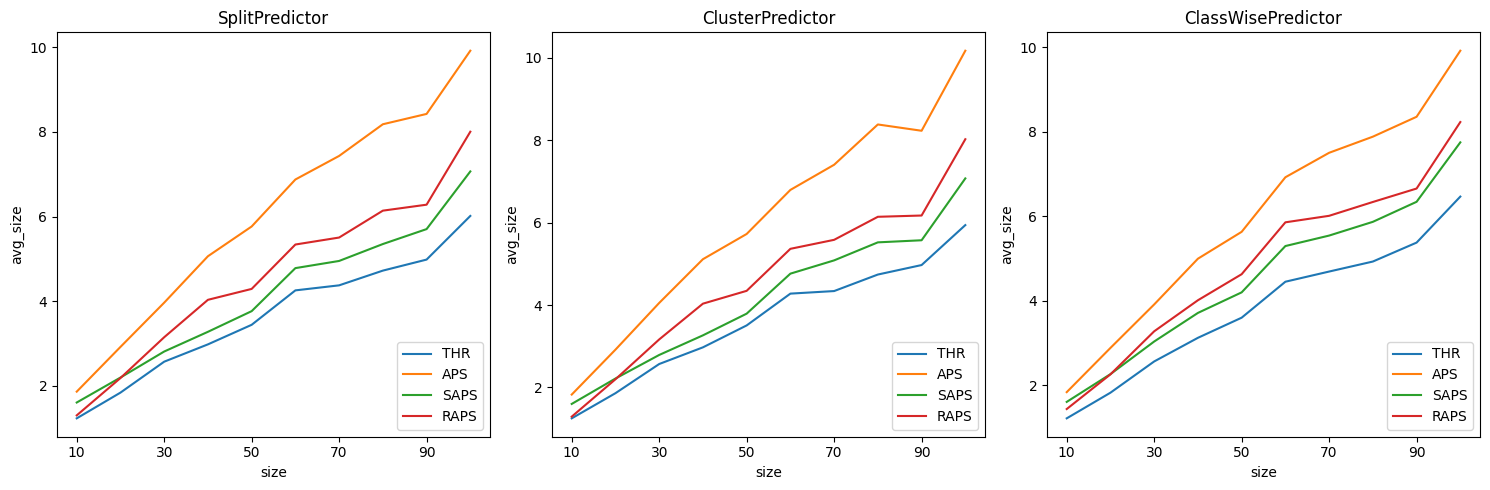

In [40]:
# 创建三个并排的折线图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for j, predictor in zip(range(3), lines_avgSizes.columns):
    # 取出每列的四条折线数据
    lines_data = lines_avgSizes.iloc[:, j]

    # 绘制每行的折线
    for i, score_function in zip(lines_avgSizes.index, lines_data):
        axes[j].plot(score_function, label=i)

    # 添加图例
    axes[j].legend(loc='lower right')
    # 设置图标题和坐标轴标签
    axes[j].set_title(predictor)
    axes[j].set_xlabel("size")
    axes[j].set_ylabel('avg_size')

    axes[j].xaxis.set_major_formatter(formatter)

# 调整布局，避免重叠
plt.tight_layout()

# 显示折线图
plt.show()
fig.savefig('results_figures/score_avgSize_compare.png')

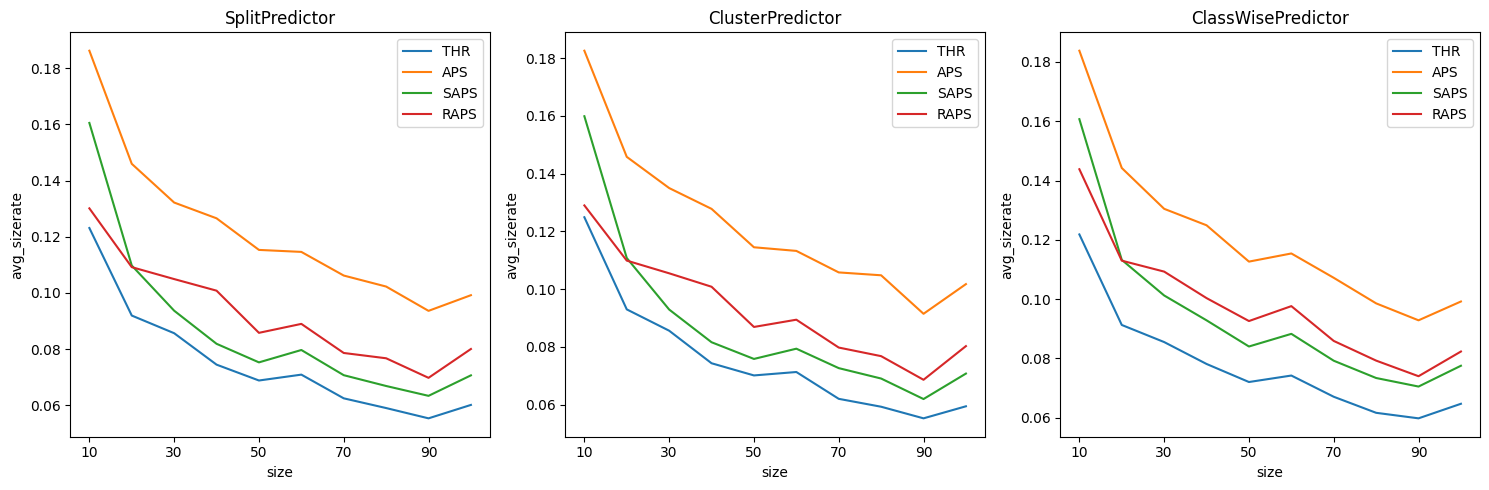

In [41]:
# 创建三个并排的折线图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for j, predictor in zip(range(3), lines_avgSizeRates.columns):
    # 取出每列的四条折线数据
    lines_data = lines_avgSizeRates.iloc[:, j]

    # 绘制每行的折线
    for i, score_function in zip(lines_avgSizeRates.index, lines_data):
        axes[j].plot(score_function, label=i)

    # 添加图例
    axes[j].legend(loc='upper right')
    # 设置图标题和坐标轴标签
    axes[j].set_title(predictor)
    axes[j].set_xlabel("size")
    axes[j].set_ylabel('avg_sizerate')

    axes[j].xaxis.set_major_formatter(formatter)

# 调整布局，避免重叠
plt.tight_layout()

# 显示折线图
plt.show()
fig.savefig('results_figures/score_avgSizeRate_compare.png')

### Compare the Predictors 

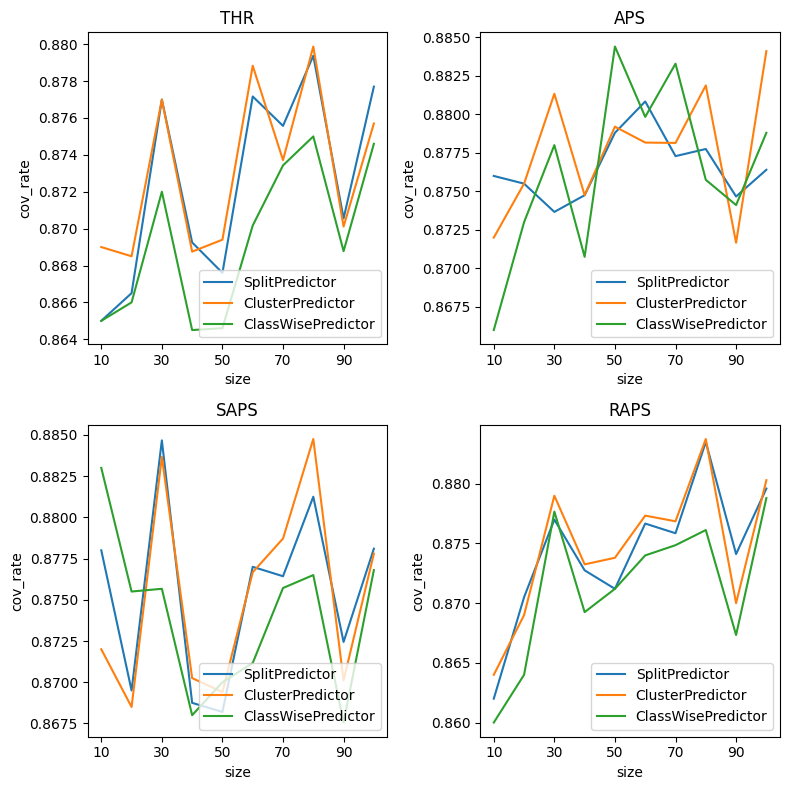

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, score_function in zip(range(4), lines_covRates.index):
    plot_idces = [(0,0), (0,1), (1,0), (1,1)]
    # 取出每列的四条折线数据
    lines_data = lines_covRates.iloc[i, :]

    # 绘制每行的折线
    for j, predictor in zip(lines_covRates.columns, lines_data):
        axes[plot_idces[i]].plot(predictor, label=j)

    # 添加图例
    axes[plot_idces[i]].legend(loc='lower right')
    # 设置图标题和坐标轴标签
    axes[plot_idces[i]].set_title(score_function)
    axes[plot_idces[i]].set_xlabel("size")
    axes[plot_idces[i]].set_ylabel('cov_rate')

    axes[plot_idces[i]].xaxis.set_major_formatter(formatter)

# 调整布局，避免重叠
plt.tight_layout()

# 显示折线图
plt.show()
fig.savefig('results_figures/predictor_covRate_compare.png')

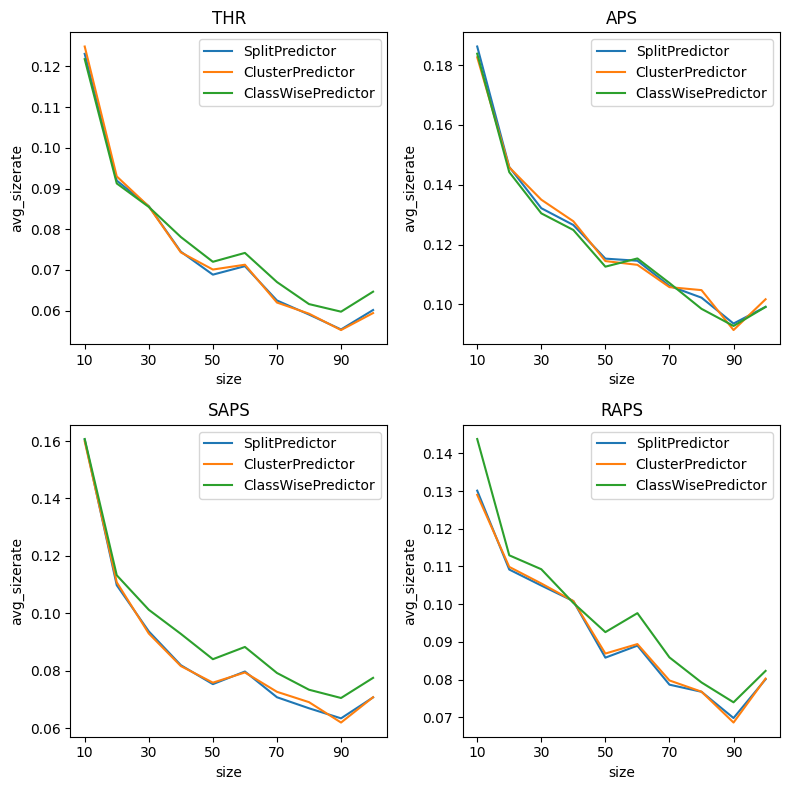

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, score_function in zip(range(4), lines_avgSizeRates.index):
    plot_idces = [(0,0), (0,1), (1,0), (1,1)]
    # 取出每列的四条折线数据
    lines_data = lines_avgSizeRates.iloc[i, :]

    # 绘制每行的折线
    for j, predictor in zip(lines_avgSizeRates.columns, lines_data):
        axes[plot_idces[i]].plot(predictor, label=j)

    # 添加图例
    axes[plot_idces[i]].legend(loc='upper right')
    # 设置图标题和坐标轴标签
    axes[plot_idces[i]].set_title(score_function)
    axes[plot_idces[i]].set_xlabel("size")
    axes[plot_idces[i]].set_ylabel('avg_sizerate')

    axes[plot_idces[i]].xaxis.set_major_formatter(formatter)
# 调整布局，避免重叠
plt.tight_layout()

# 显示折线图
plt.show()
fig.savefig('results_figures/predictor_avgSizeRate_compare.png')

## Compare the Average Performances of Different CP Schemes

In [44]:
avg_covRates = lines_covRates.applymap(lambda x: np.mean(x))
avg_avgSizeRate = lines_avgSizeRates.applymap(lambda x: np.mean(x))

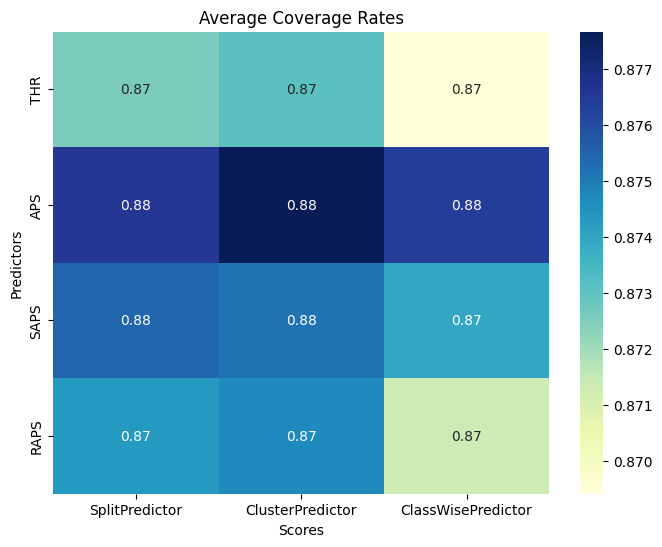

In [45]:
import seaborn as sns

# 画热力图
fig = plt.figure(figsize=(8, 6))
sns.heatmap(avg_covRates, annot=True, cmap='YlGnBu', fmt='.2f')

# 设置标题和标签
plt.title('Average Coverage Rates')
plt.xlabel('Scores')
plt.ylabel('Predictors')

# 显示热力图
plt.show()
plt.tight_layout
fig.savefig('results_figures/avg_covRates.png')

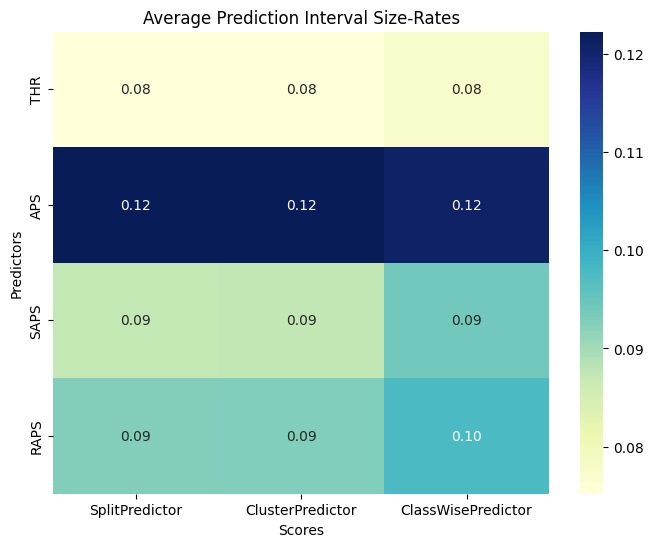

In [46]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(avg_avgSizeRate, annot=True, cmap='YlGnBu', fmt='.2f')

# 设置标题和标签
plt.title('Average Prediction Interval Size-Rates')
plt.xlabel('Scores')
plt.ylabel('Predictors')

# 显示热力图
plt.show()
plt.tight_layout
fig.savefig('results_figures/avg_avgSizeRates.png')